# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | saint-francois
Processing Record 7 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | kapuskasing
Processing Record 10 of Set 1 | yuzhno-kurilsk
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | klyuchi
Processing Record 16 of Set 1 | north bend
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | olyokminsk
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of 

Processing Record 37 of Set 4 | lakatoro
Processing Record 38 of Set 4 | borovskoy
Processing Record 39 of Set 4 | tazacorte
Processing Record 40 of Set 4 | mata-utu
Processing Record 41 of Set 4 | socorro
Processing Record 42 of Set 4 | new plymouth
Processing Record 43 of Set 4 | olonkinbyen
Processing Record 44 of Set 4 | stanley
Processing Record 45 of Set 4 | fort st. john
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | banda aceh
Processing Record 48 of Set 4 | luganville
Processing Record 49 of Set 4 | nemuro
Processing Record 0 of Set 5 | kavieng
Processing Record 1 of Set 5 | muisne
Processing Record 2 of Set 5 | yanam
Processing Record 3 of Set 5 | barah
Processing Record 4 of Set 5 | poronaysk
Processing Record 5 of Set 5 | namibe
Processing Record 6 of Set 5 | nar'yan-mar
Processing Record 7 of Set 5 | khorixas
Processing Record 8 of Set 5 | alotau
City not found. Skipping...
Processing Record 9 of Set 5 | lompoc
Processing Record 10 of Set 5 

Processing Record 26 of Set 8 | carnarvon
Processing Record 27 of Set 8 | franceville
Processing Record 28 of Set 8 | trat
Processing Record 29 of Set 8 | hood river
Processing Record 30 of Set 8 | alofi
Processing Record 31 of Set 8 | berdigestyakh
Processing Record 32 of Set 8 | baniachang
Processing Record 33 of Set 8 | tanumah
Processing Record 34 of Set 8 | recani
Processing Record 35 of Set 8 | udachny
Processing Record 36 of Set 8 | al hamul
Processing Record 37 of Set 8 | belomorsk
Processing Record 38 of Set 8 | baykal'sk
Processing Record 39 of Set 8 | kharp
Processing Record 40 of Set 8 | zouerate
Processing Record 41 of Set 8 | dwarka
Processing Record 42 of Set 8 | walvis bay
Processing Record 43 of Set 8 | vilyuchinsk
Processing Record 44 of Set 8 | kario ghanwar
Processing Record 45 of Set 8 | ayas
Processing Record 46 of Set 8 | komotini
Processing Record 47 of Set 8 | sungai penuh
Processing Record 48 of Set 8 | pathein
Processing Record 49 of Set 8 | rehoboth
Processi

Processing Record 17 of Set 12 | firuzabad
Processing Record 18 of Set 12 | azemmour
Processing Record 19 of Set 12 | ballina
Processing Record 20 of Set 12 | ust'-kulom
Processing Record 21 of Set 12 | tinghir
Processing Record 22 of Set 12 | sola
Processing Record 23 of Set 12 | queenstown
Processing Record 24 of Set 12 | krasnokholmskiy
Processing Record 25 of Set 12 | aurora
Processing Record 26 of Set 12 | achacachi
Processing Record 27 of Set 12 | hailey
Processing Record 28 of Set 12 | douarnenez
Processing Record 29 of Set 12 | nanga eboko
Processing Record 30 of Set 12 | haining
Processing Record 31 of Set 12 | tweed heads
Processing Record 32 of Set 12 | luling
Processing Record 33 of Set 12 | newnham
Processing Record 34 of Set 12 | babolsar
Processing Record 35 of Set 12 | diamantino
Processing Record 36 of Set 12 | gamba
Processing Record 37 of Set 12 | conception bay south
Processing Record 38 of Set 12 | dolinsk
Processing Record 39 of Set 12 | yoko
Processing Record 40 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.16,77,51,16.10,TF,1695740112
1,waitangi,-43.9535,-176.5597,12.68,98,100,6.26,NZ,1695740112
2,grytviken,-54.2811,-36.5092,-1.31,75,27,2.03,GS,1695740112
3,talnakh,69.4865,88.3972,2.34,99,100,3.65,RU,1695740113
4,lebu,-37.6167,-73.6500,10.40,61,94,5.31,CL,1695740113


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.16,77,51,16.10,TF,1695740112
1,waitangi,-43.9535,-176.5597,12.68,98,100,6.26,NZ,1695740112
2,grytviken,-54.2811,-36.5092,-1.31,75,27,2.03,GS,1695740112
3,talnakh,69.4865,88.3972,2.34,99,100,3.65,RU,1695740113
4,lebu,-37.6167,-73.6500,10.40,61,94,5.31,CL,1695740113


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

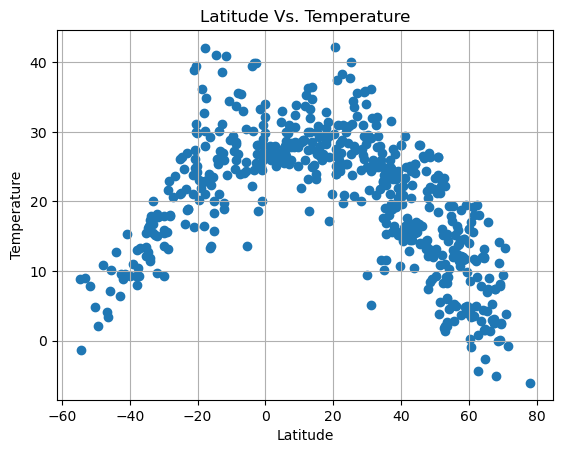

In [55]:
# Build scatter plot for latitude vs. temperature
temper = city_data_df['Max Temp']
lat = city_data_df['Lat']
plt.scatter(lat,temper)

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

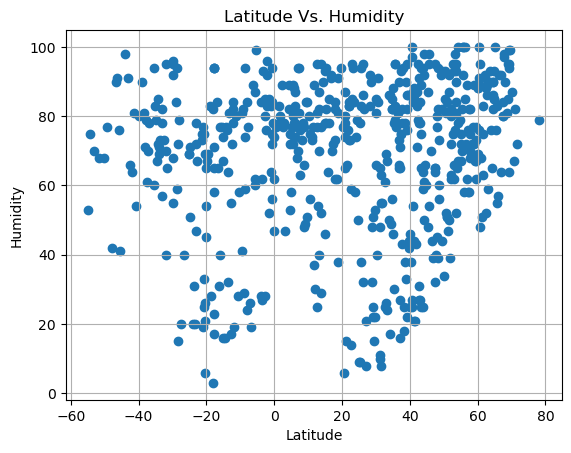

In [56]:
# Build the scatter plots for latitude vs. humidity
humid = city_data_df['Humidity']
lat = city_data_df['Lat']
plt.scatter(lat,humid)

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

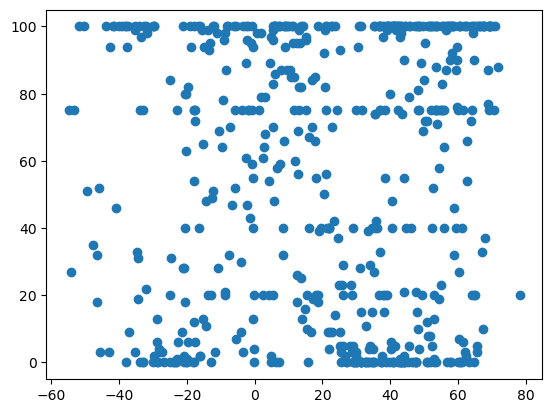

In [17]:
# Build the scatter plots for latitude vs. cloudiness
clouds = city_data_df['Cloudiness']
lat = city_data_df['Lat']
plt.scatter(lat,clouds)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

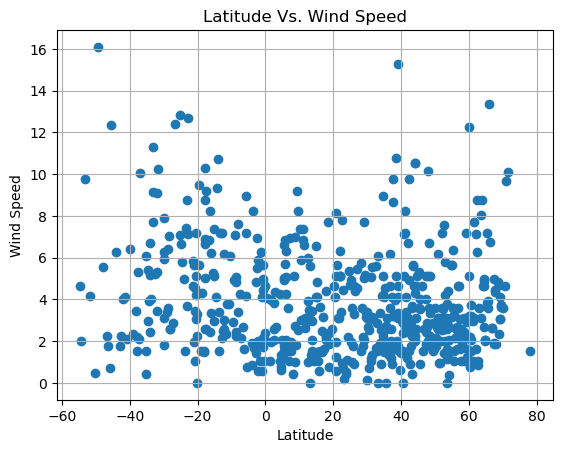

In [57]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df['Wind Speed']
lat = city_data_df['Lat']
plt.scatter(lat,wind)

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
# Matplotlib class answers to format function 
def lin_regress(x_axis, y_axis, t):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.xlabel ("Latitude")
    plt.ylabel (y_axis.name)
    plt.title (t)
    print (f" R-Value: {rvalue})")
    print(line_eq)
    plt.show()
    

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,talnakh,69.4865,88.3972,2.34,99,100,3.65,RU,1695740113
5,saint-francois,46.4154,3.9054,26.49,44,0,1.54,FR,1695740113
7,kapuskasing,49.4169,-82.4331,12.00,82,20,1.54,CA,1695740114
8,yuzhno-kurilsk,44.0306,145.8556,15.42,94,90,2.24,RU,1695740114
9,tura,25.5198,90.2201,23.86,94,3,1.00,IN,1695740114


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.16,77,51,16.10,TF,1695740112
1,waitangi,-43.9535,-176.5597,12.68,98,100,6.26,NZ,1695740112
2,grytviken,-54.2811,-36.5092,-1.31,75,27,2.03,GS,1695740112
4,lebu,-37.6167,-73.6500,10.40,61,94,5.31,CL,1695740113
6,hermanus,-34.4187,19.2345,16.41,72,19,3.91,ZA,1695740113


###  Temperature vs. Latitude Linear Regression Plot

 R-Value: -0.7853850648576722)
y = -0.39x + 34.45


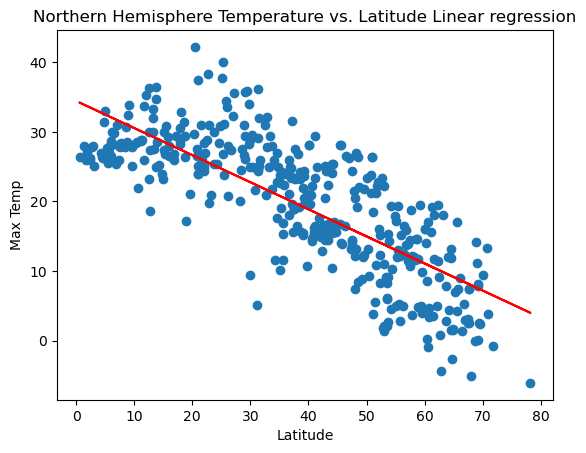

In [66]:
# Linear regression on Northern Hemisphere
t = "Northern Hemisphere Temperature vs. Latitude Linear regression"
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
lin_regress(x_axis,y_axis,t)

 R-Value: 0.768792473585821)
y = 0.49x + 32.15


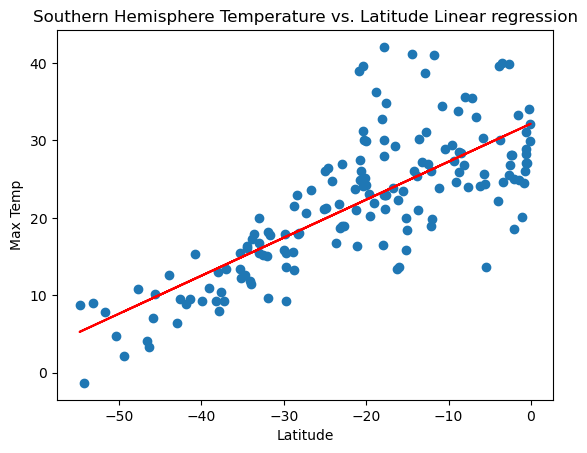

In [67]:
# Linear regression on Southern Hemisphere
t = "Southern Hemisphere Temperature vs. Latitude Linear regression"
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
lin_regress(x_axis,y_axis,t)

**Discussion about the linear relationship:** The graphs show a correlation with the maximum temperature and the closiness to the equator. The northern hemisphere shows a negative correlation meaning closer to 0 in latitude the hotter it would be and vice versa for the southern hemishphere which has a positive correlation

### Humidity vs. Latitude Linear Regression Plot

 R-Value: 0.12420410461060792)
y = 0.14x + 64.5


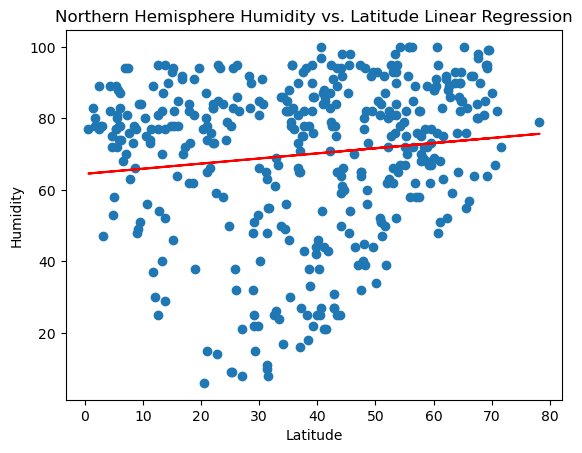

In [63]:
# Northern Hemisphere Humidity vs. Latitude Linear Regression
t = "Northern Hemisphere Humidity vs. Latitude Linear Regression"
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
lin_regress(x_axis,y_axis,t)

 R-Value: -0.09397650420192567)
y = -0.16x + 60.88


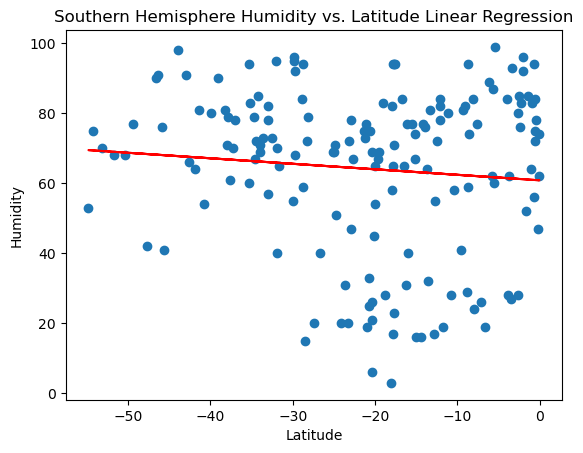

In [64]:
# Southern Hemisphere
t = "Southern Hemisphere Humidity vs. Latitude Linear Regression"
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
lin_regress(x_axis,y_axis,t)

**Discussion about the linear relationship:** When looking at both graphs it is seen that there is a poor correlation between Humidity and Latitude. This indicate Humidity is impacted by various factors besides just Latitude

### Cloudiness vs. Latitude Linear Regression Plot

 R-Value: 0.03766986126771376)
y = 0.08x + 52.38


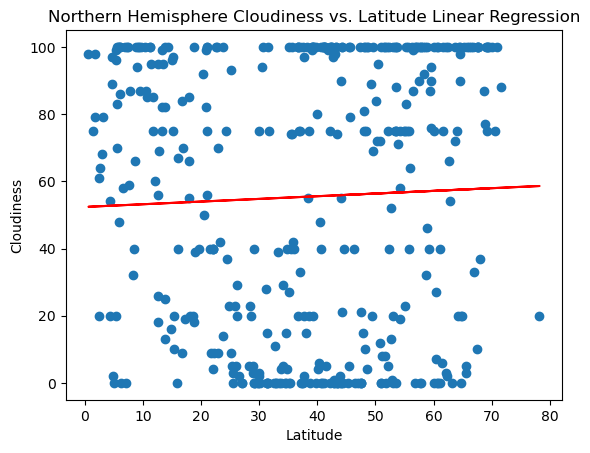

In [68]:
# Northern Hemisphere
t = "Northern Hemisphere Cloudiness vs. Latitude Linear Regression"
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
lin_regress(x_axis,y_axis,t)

 R-Value: 0.027130827182460623)
y = 0.08x + 53.57


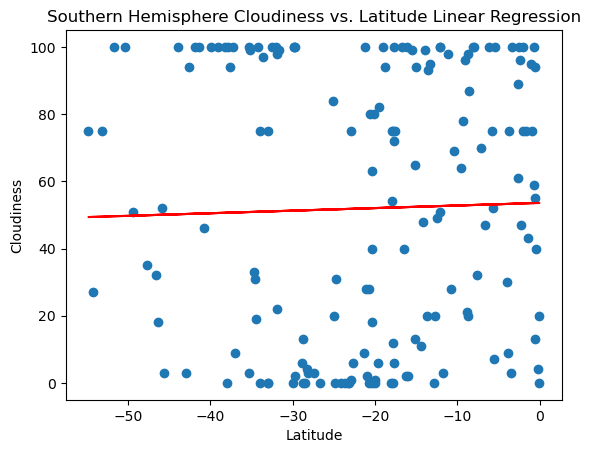

In [69]:
# Southern Hemisphere
t = "Southern Hemisphere Cloudiness vs. Latitude Linear Regression"
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
lin_regress(x_axis,y_axis,t)

**Discussion about the linear relationship:** When looking at both graphs it is seen that there is a poor correlation between Cloudiness and Latitude. This indicate Cloudiness is impacted by various factors besides just Latitude. This is further supported with the r value being low for both northern and southern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

 R-Value: 0.0635663606151091)
y = 0.01x + 3.17


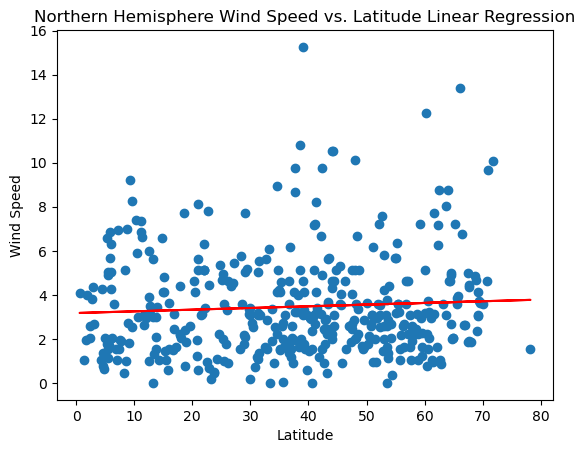

In [71]:
# Northern Hemisphere
t = "Northern Hemisphere Wind Speed vs. Latitude Linear Regression"
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
lin_regress(x_axis,y_axis,t)

 R-Value: -0.14805292595891303)
y = -0.03x + 4.07


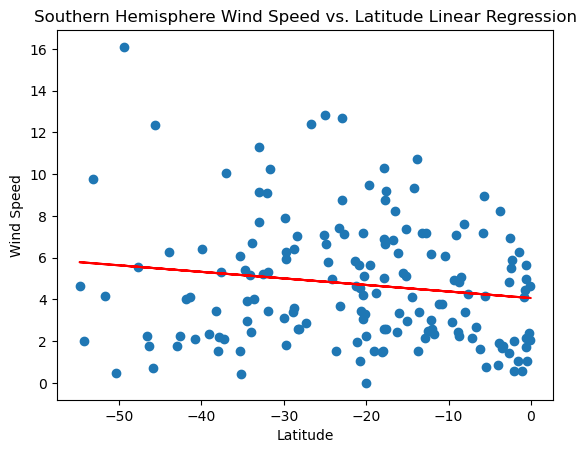

In [72]:
# Southern Hemisphere
t = "Southern Hemisphere Wind Speed vs. Latitude Linear Regression"
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
lin_regress(x_axis,y_axis,t)

**Discussion about the linear relationship:** When looking at both graphs it is seen that there is a poor correlation between Wind Speed and Latitude. This indicate Wind Speed is impacted by various factors besides just Latitude. This is further supported with the r value being low for both northern and southern hemisphere